In [ ]:
import pandas as pd
df = pd.read_csv('Machine_performance_analysis.csv')

In [ ]:
df.head()

,MachineID,OperatingTemperature,VibrationLevel,CycleCount,AmbientTemperature,OperatingHours,FailureProbability,FailureStatus
0,M3,75.212647,0.689170,7238,30.230308,13,0.442165,0
1,M4,91.022148,0.759652,1671,18.511730,15,0.735483,1
2,M1,78.155552,0.567402,8603,38.287785,4,0.549437,0
3,M3,62.743191,0.247715,3075,32.758765,16,0.288298,0
4,M3,59.711426,0.568552,4016,23.599941,12,0.243036,0


In [ ]:
df.shape

(1000, 8)

In [ ]:
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

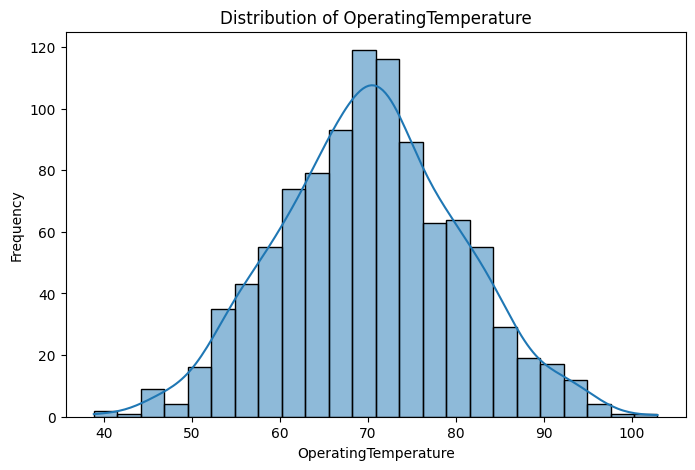

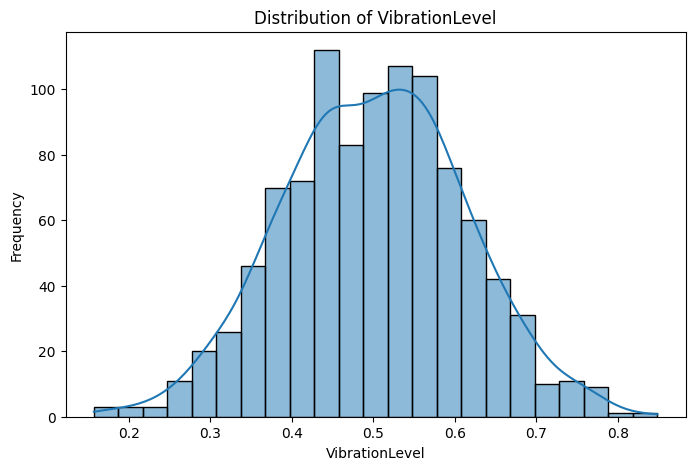

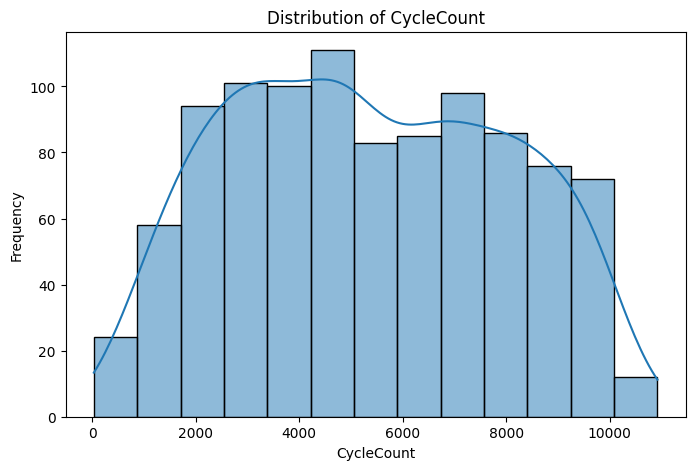

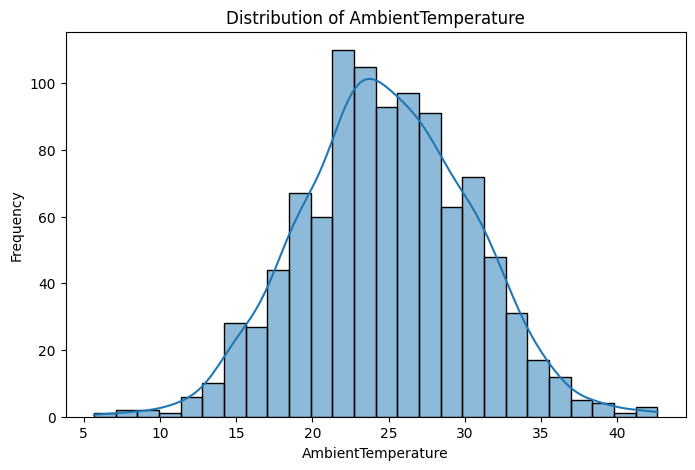

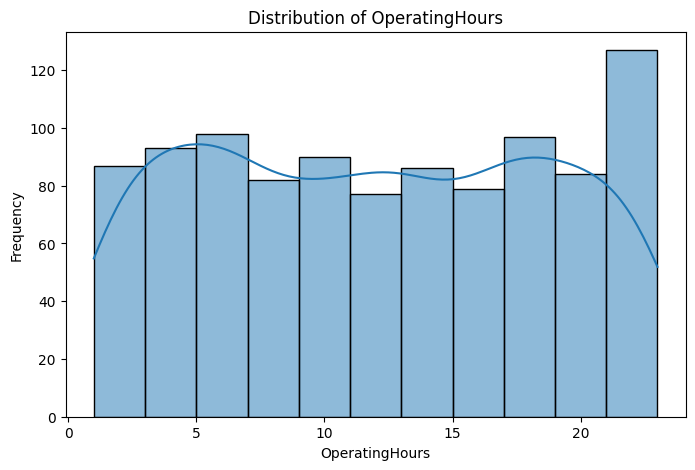

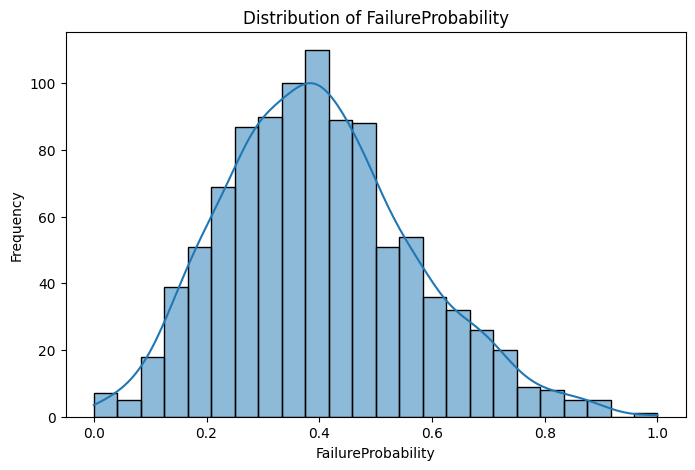

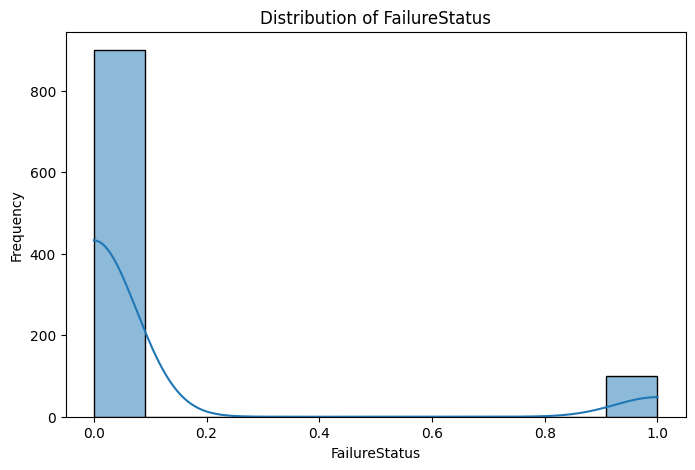

In [ ]:
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

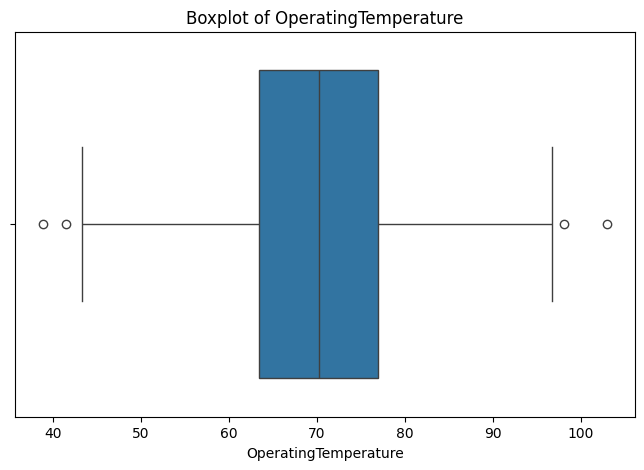

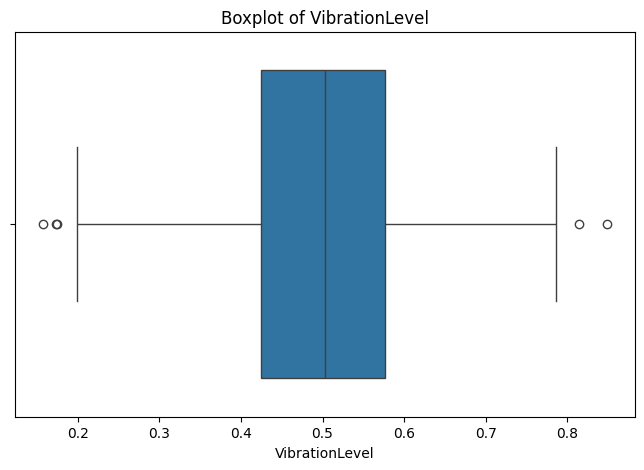

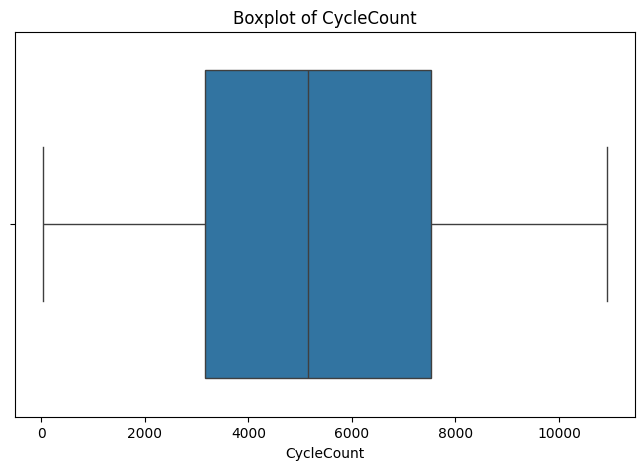

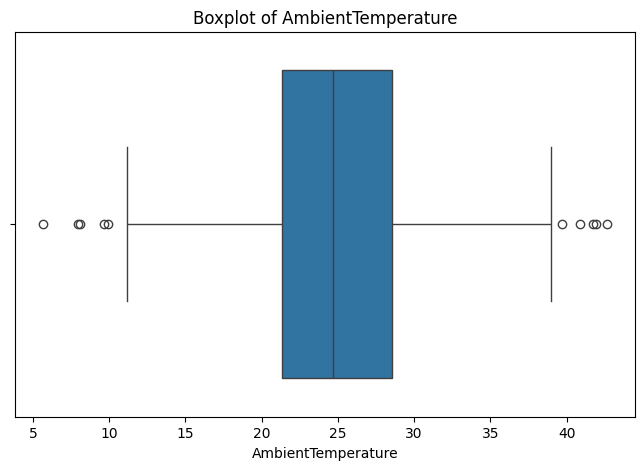

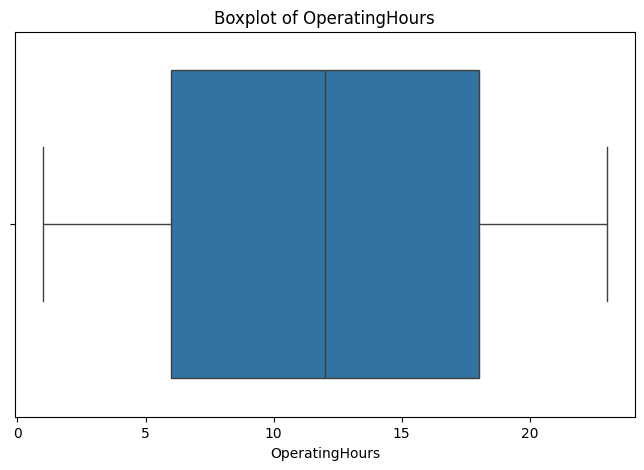

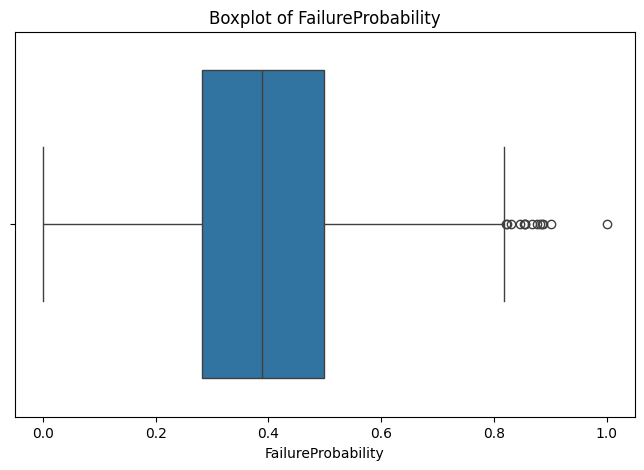

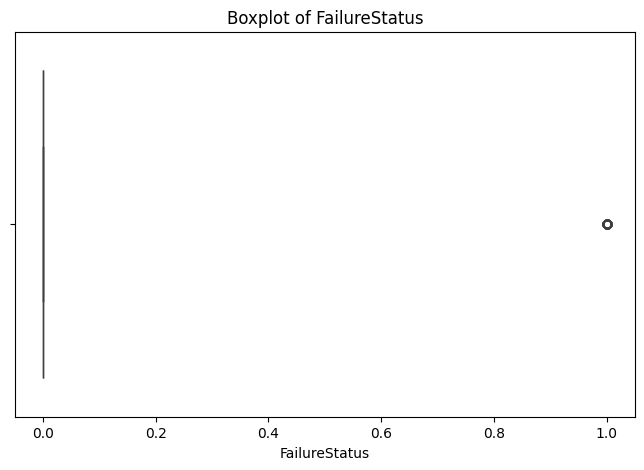

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
# the following variables conatin outliers

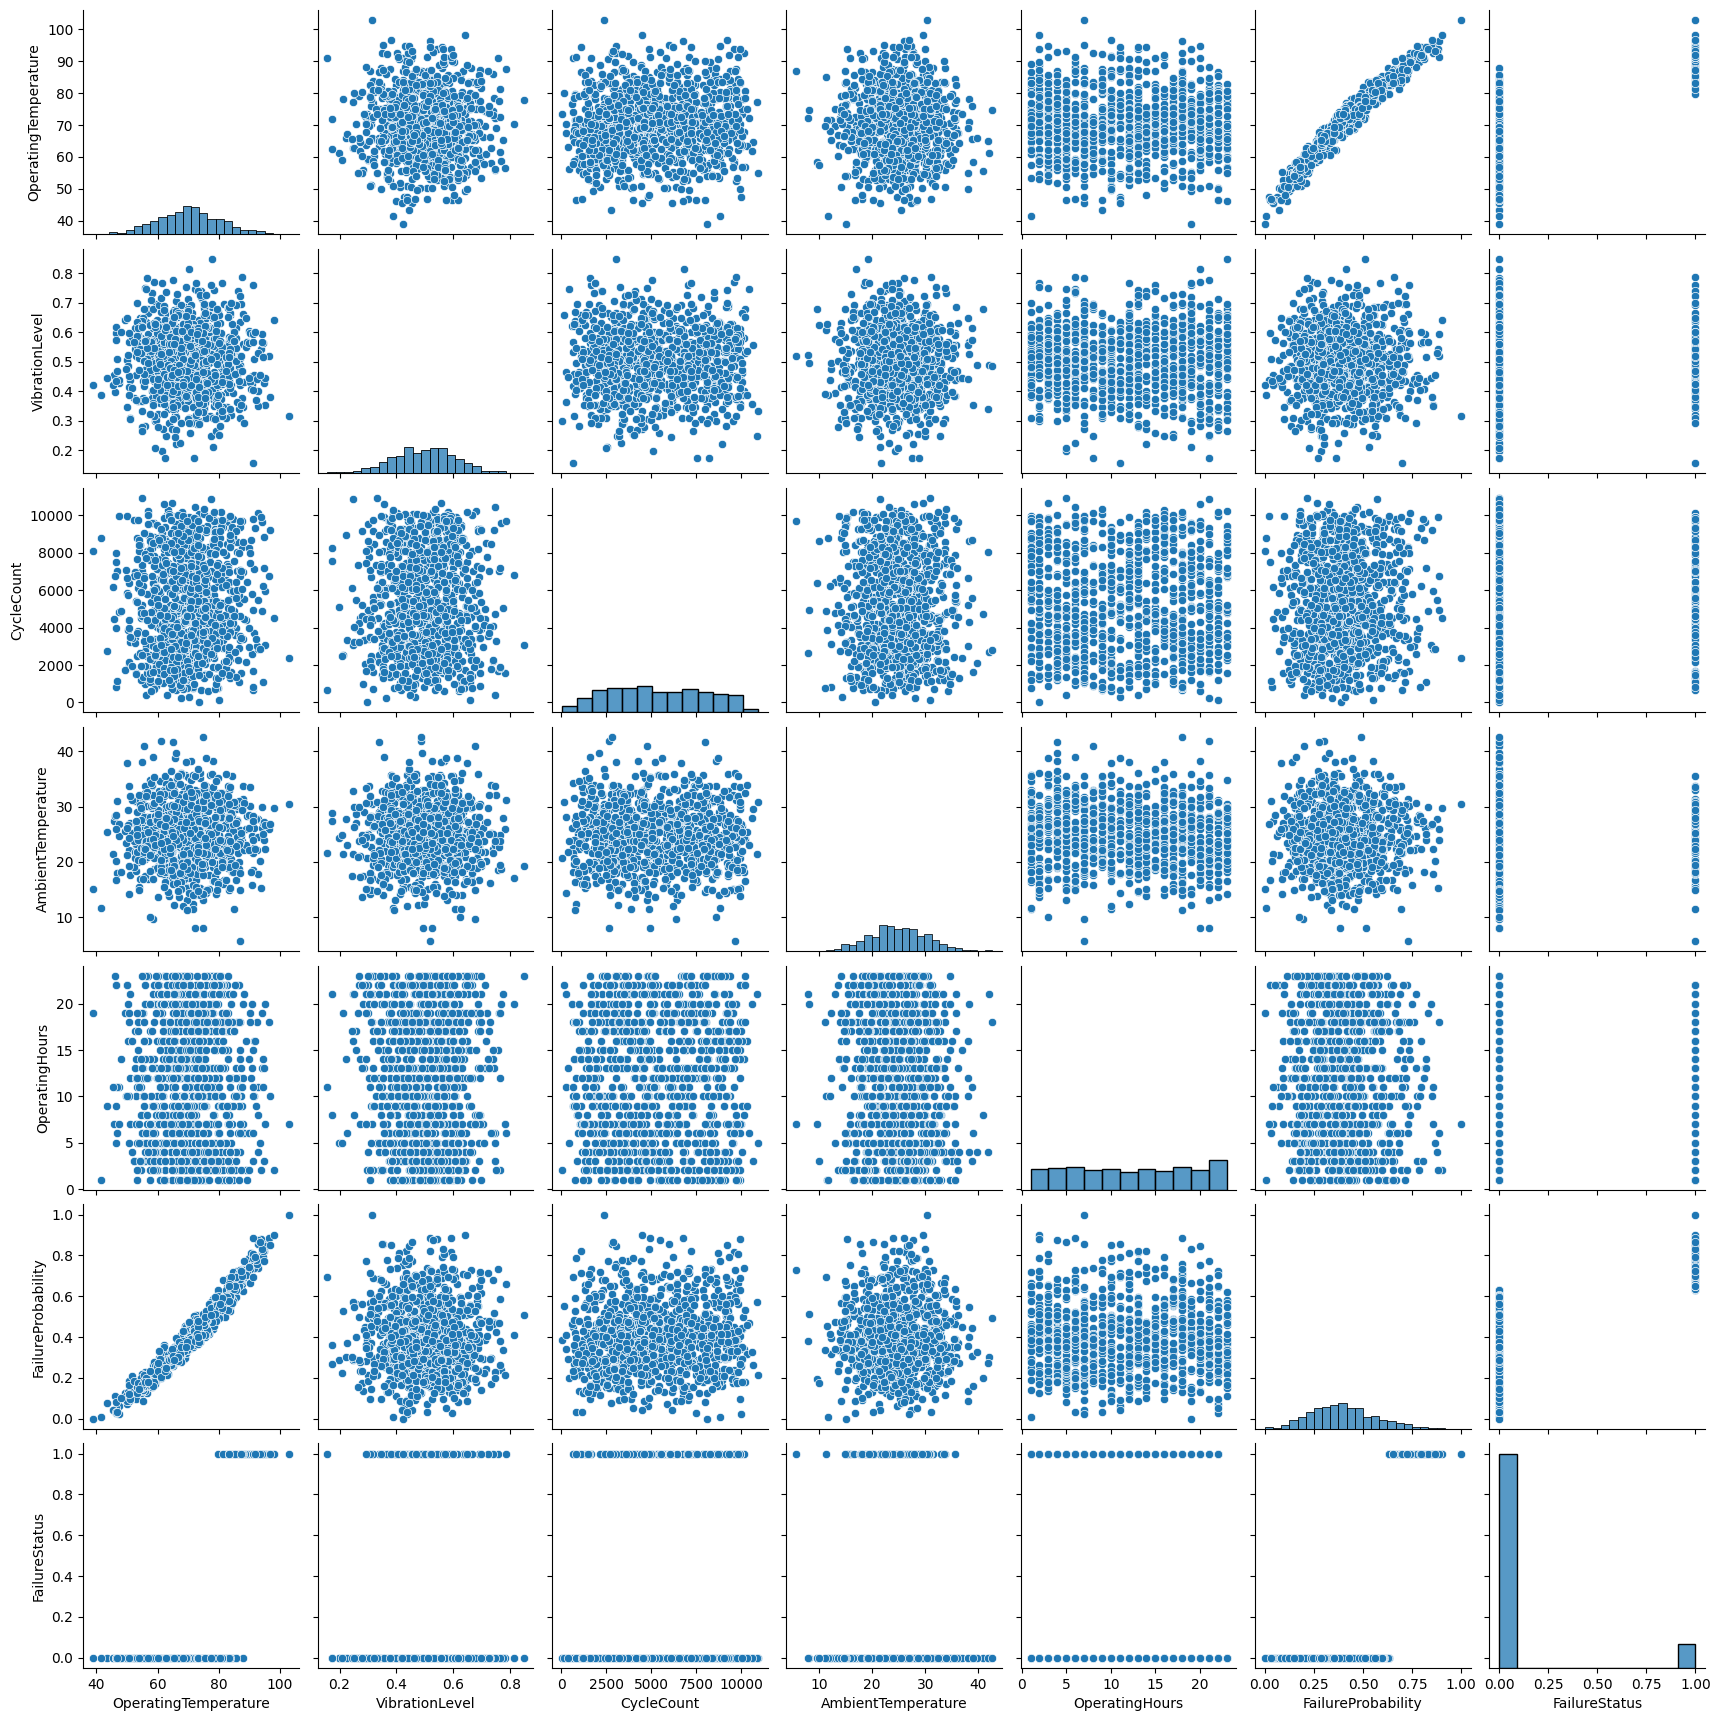

In [ ]:
sns.pairplot(df)

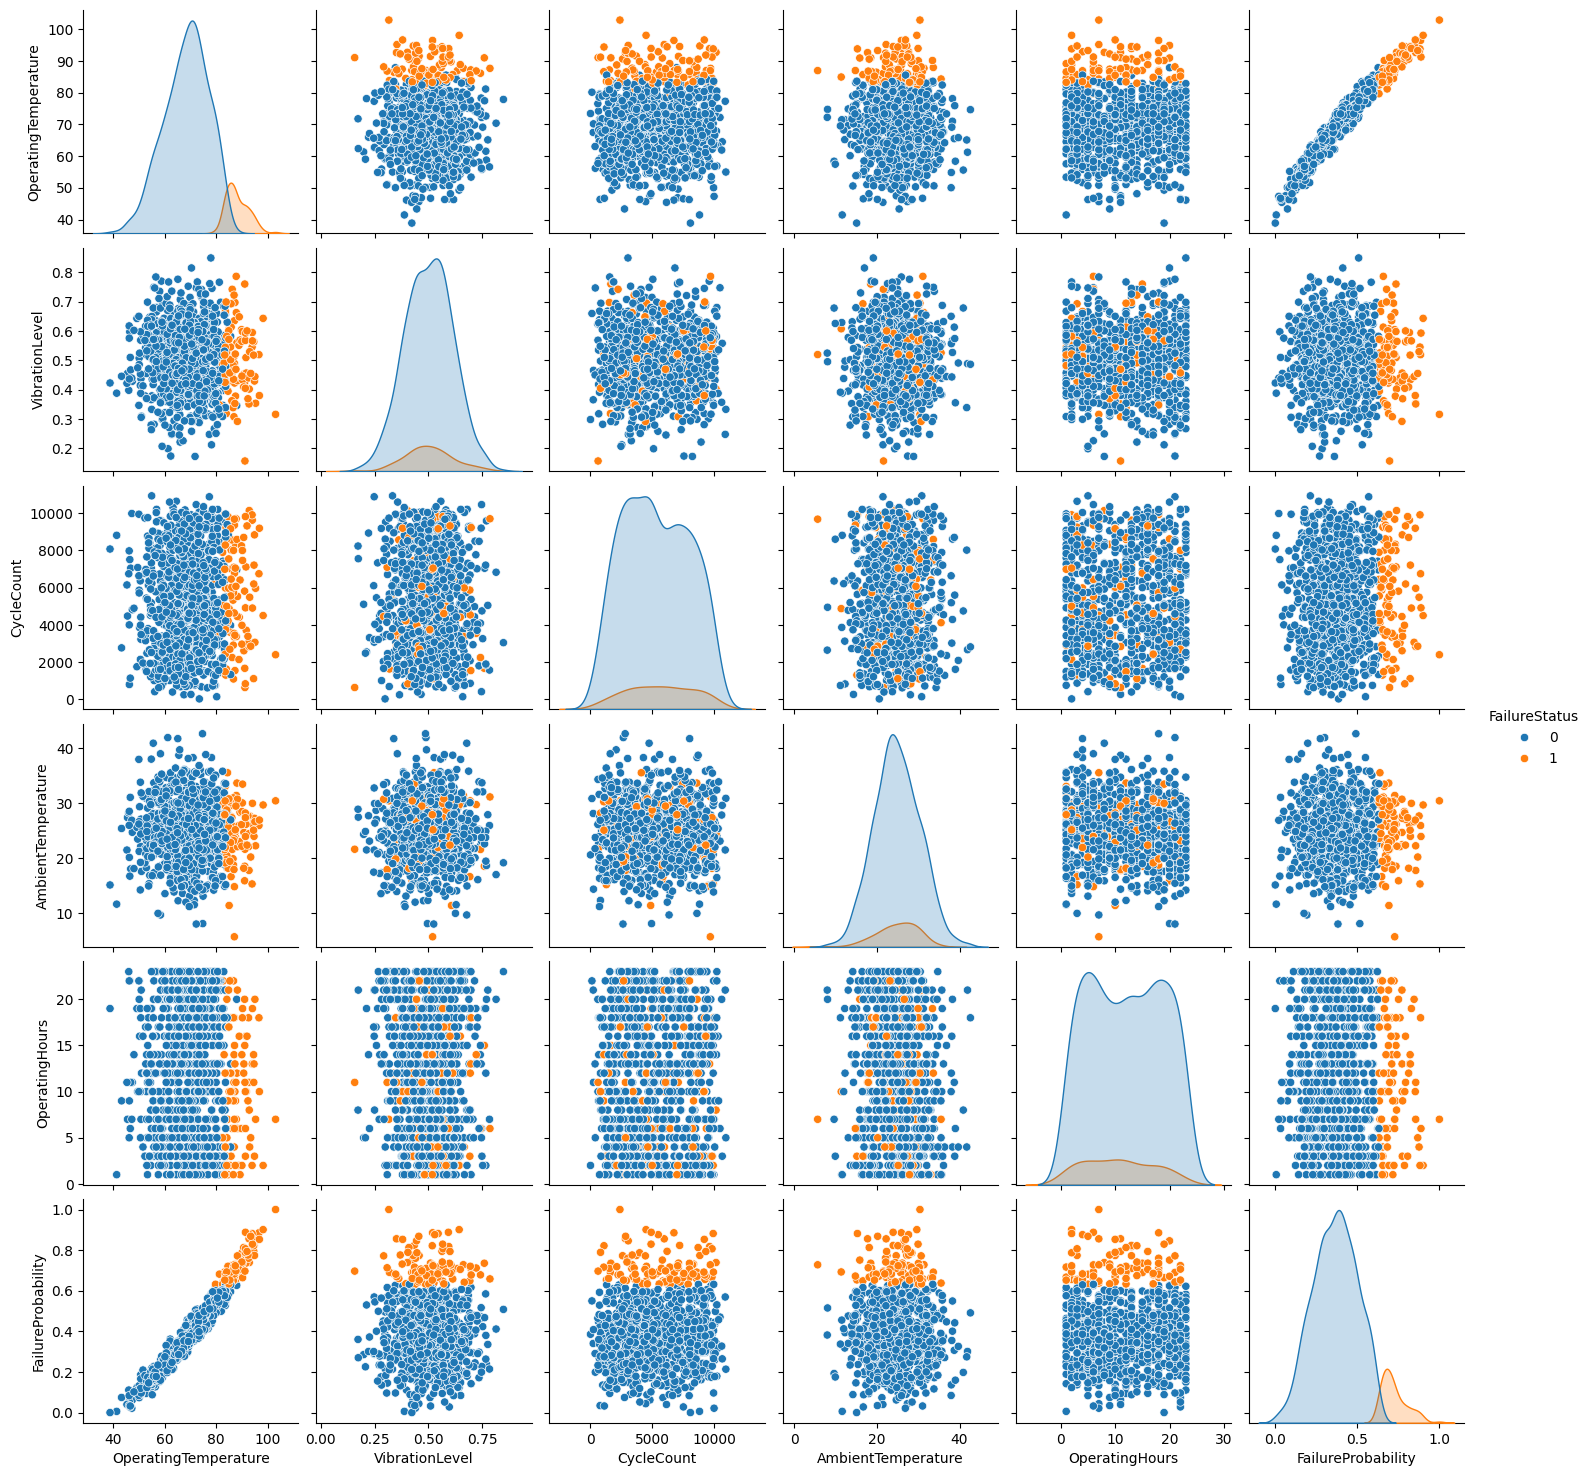

In [ ]:
sns.pairplot(df, hue='FailureStatus')

In [ ]:
df['temp_gt_85'] = (df['OperatingTemperature'] > 85).astype(int)
display(df.head())

,MachineID,OperatingTemperature,VibrationLevel,CycleCount,AmbientTemperature,OperatingHours,FailureProbability,FailureStatus,temp_gt_85
0,M3,75.212647,0.689170,7238,30.230308,13,0.442165,0,0
1,M4,91.022148,0.759652,1671,18.511730,15,0.735483,1,1
2,M1,78.155552,0.567402,8603,38.287785,4,0.549437,0,0
3,M3,62.743191,0.247715,3075,32.758765,16,0.288298,0,0
4,M3,59.711426,0.568552,4016,23.599941,12,0.243036,0,0


In [ ]:
cross_tab = pd.crosstab(df['temp_gt_85'], df['FailureStatus'])
display(cross_tab)

FailureStatus,0,1
temp_gt_85,,
0,897,29
1,3,71


In [ ]:
# Assuming 'FailureStatus' = 1 is the positive class
TN = cross_tab.iloc[0, 0]
FP = cross_tab.iloc[0, 1]
FN = cross_tab.iloc[1, 0]
TP = cross_tab.iloc[1, 1]

print("Confusion Matrix:")
print(cross_tab)

print("\nMetrics:")
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.4f}")

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print(f"Precision: {precision:.4f}")

recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Recall: {recall:.4f}")

f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"F1 Score: {f1_score:.4f}")

Confusion Matrix:
FailureStatus    0   1
temp_gt_85            
0              897  29
1                3  71

Metrics:
Accuracy: 0.9680
Precision: 0.7100
Recall: 0.9595
F1 Score: 0.8161


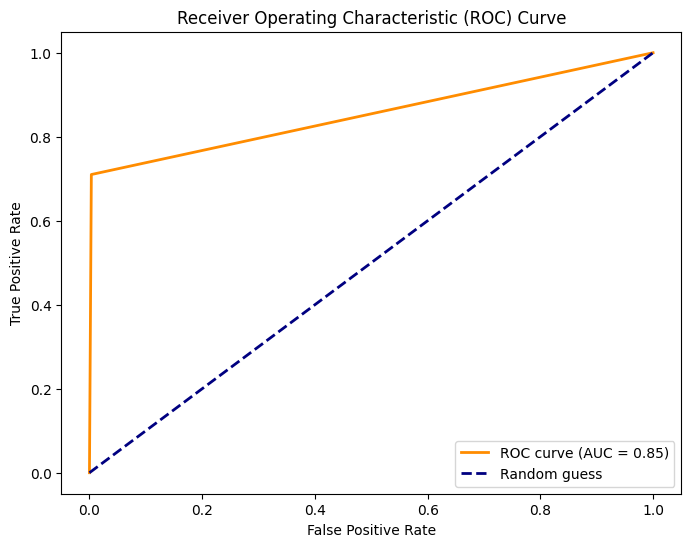

AUC: 0.8533


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'FailureStatus' is the true label (y_true) and 'temp_gt_85' is the predicted score/probability (y_score)
# For a binary predictor like temp_gt_85, we can use it directly as the score.
y_true = df['FailureStatus']
y_score = df['temp_gt_85']

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Prepare data for modeling
# Assuming 'FailureStatus' is the target variable and the rest are features
X = df.drop(['FailureStatus', 'MachineID'], axis=1) # Drop MachineID as it's likely not a feature
y = df['FailureStatus']

# Split data into training and testing sets (optional, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
# Using X and y for cross-validation on the entire dataset for a more robust evaluation
cv_scores = cross_val_score(gnb, X, y, cv=kf, scoring='accuracy')

# Report cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {cv_scores.std():.4f}")

Cross-validation Accuracy Scores: [0.965 0.98  0.985 0.975 0.95 ]
Mean Cross-validation Accuracy: 0.9710
Standard Deviation of Cross-validation Accuracy: 0.0124


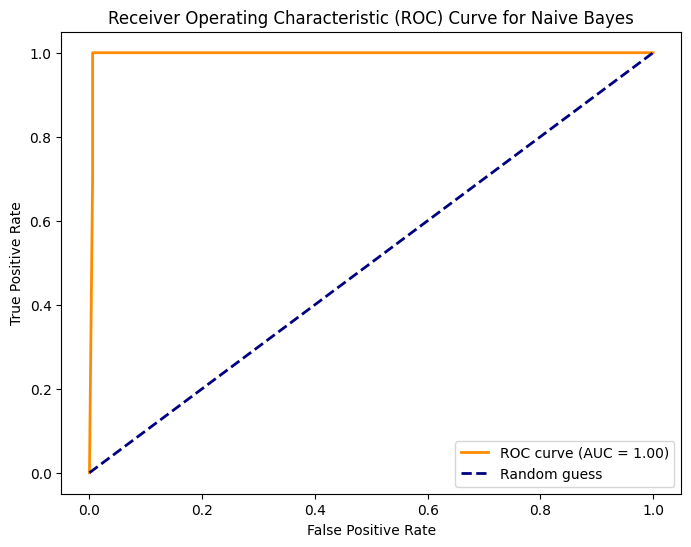

AUC for Naive Bayes: 0.9964


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the Gaussian Naive Bayes model on the training data
gnb.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1)
y_pred_proba = gnb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

print(f"AUC for Naive Bayes: {roc_auc:.4f}")

In [ ]:
from sklearn.metrics import classification_report

# Predict class labels on the test set
y_pred = gnb.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Naive Bayes:")
print(class_report)

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       180
           1       0.93      0.70      0.80        20

    accuracy                           0.96       200
   macro avg       0.95      0.85      0.89       200
weighted avg       0.96      0.96      0.96       200



# Task
Build and evaluate a Decision Tree model using 5-fold cross-validation, generate a classification report, and plot the ROC curve.

## Build and evaluate decision tree model with cross-validation

### Subtask:
Initialize a Decision Tree Classifier and use KFold cross-validation to train and evaluate the model on different folds of the data, reporting accuracy scores.


**Reasoning**:
Initialize a Decision Tree Classifier, set up KFold cross-validation, and perform cross-validation to get accuracy scores.



In [ ]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_dt = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

# Report cross-validation results
print(f"Cross-validation Accuracy Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean Cross-validation Accuracy (Decision Tree): {cv_scores_dt.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy (Decision Tree): {cv_scores_dt.std():.4f}")

Cross-validation Accuracy Scores (Decision Tree): [1.   1.   1.   0.99 0.99]
Mean Cross-validation Accuracy (Decision Tree): 0.9960
Standard Deviation of Cross-validation Accuracy (Decision Tree): 0.0049


## Evaluate decision tree model on test set

### Subtask:
Train the Decision Tree model on the entire training set and evaluate its performance on the test set by generating a classification report.


**Reasoning**:
Fit the Decision Tree model to the training data and generate a classification report on the test set.



In [ ]:
# Fit the Decision Tree model on the training data
dt.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_dt = dt.predict(X_test)

# Generate classification report
class_report_dt = classification_report(y_test, y_pred_dt)

# Print the classification report
print("Classification Report for Decision Tree:")
print(class_report_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Plot roc curve for decision tree model

### Subtask:
Predict probabilities for the positive class on the test set and plot the ROC curve, calculating and displaying the AUC.


**Reasoning**:
Predict probabilities for the positive class on the test set, calculate and plot the ROC curve, calculate AUC, and print the AUC.



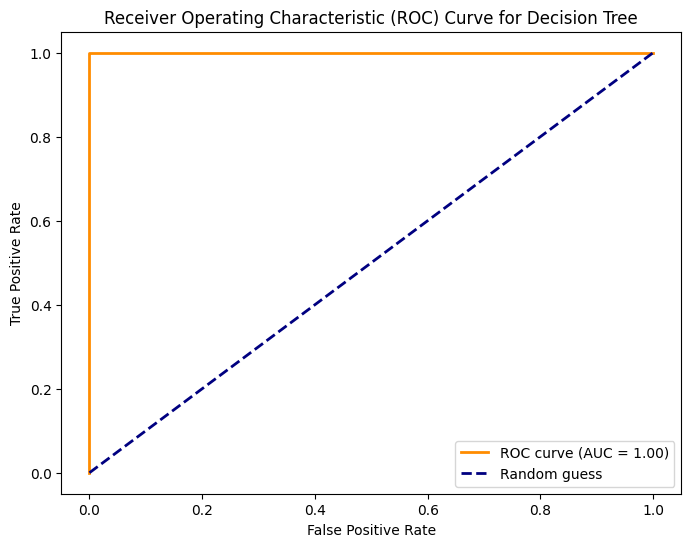

AUC for Decision Tree: 1.0000


In [ ]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC value
print(f"AUC for Decision Tree: {roc_auc_dt:.4f}")

## Summary:

### Data Analysis Key Findings

*   The Decision Tree model achieved a mean cross-validation accuracy of 0.9960 with a standard deviation of 0.0049 across 5 folds.
*   The model demonstrated perfect performance on the test set, as indicated by a classification report showing precision, recall, and f1-score of 1.00 for both classes, resulting in an overall accuracy of 1.00.
*   The ROC curve for the Decision Tree model on the test set shows an AUC of 1.00, indicating perfect classification performance.

### Insights or Next Steps

*   The Decision Tree model appears to be overfitting or the dataset might be too simple for this model, given the perfect performance on both cross-validation and the test set. Further analysis with more complex datasets or regularization techniques might be beneficial.
*   Investigate the features used by the Decision Tree to achieve perfect separation. This could provide insights into the data's structure and inform future model development.


# Task
Analyze the provided dataset by performing the following steps: create a new binary column 'temp_gt_85' based on 'Operating Temperature', generate a crosstab between 'temp_gt_85' and 'Failure Status', calculate and display metrics and a confusion matrix for the crosstab, plot the AUC ROC curve for the crosstab, build and evaluate Naive Bayes, Decision Tree, and Random Forest models using 5-fold cross-validation, generate classification reports for each model, and plot ROC curves for each model.

## Build and evaluate random forest model with cross-validation

### Subtask:
Initialize a Random Forest Classifier and use KFold cross-validation to train and evaluate the model on different folds of the data, reporting accuracy scores.


**Reasoning**:
Initialize a Random Forest Classifier, set up KFold cross-validation, and perform cross-validation to get accuracy scores.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up KFold cross-validation (kf is already defined)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

# Report cross-validation results
print(f"Cross-validation Accuracy Scores (Random Forest): {cv_scores_rf}")
print(f"Mean Cross-validation Accuracy (Random Forest): {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy (Random Forest): {cv_scores_rf.std():.4f}")

Cross-validation Accuracy Scores (Random Forest): [1.   1.   1.   0.99 0.99]
Mean Cross-validation Accuracy (Random Forest): 0.9960
Standard Deviation of Cross-validation Accuracy (Random Forest): 0.0049


**Reasoning**:
Fit the Random Forest model to the training data and generate a classification report on the test set.



In [ ]:
# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_rf = rf.predict(X_test)

# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the classification report
print("Classification Report for Random Forest:")
print(class_report_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**Reasoning**:
Predict probabilities for the positive class on the test set, calculate and plot the ROC curve, calculate AUC, and print the AUC.



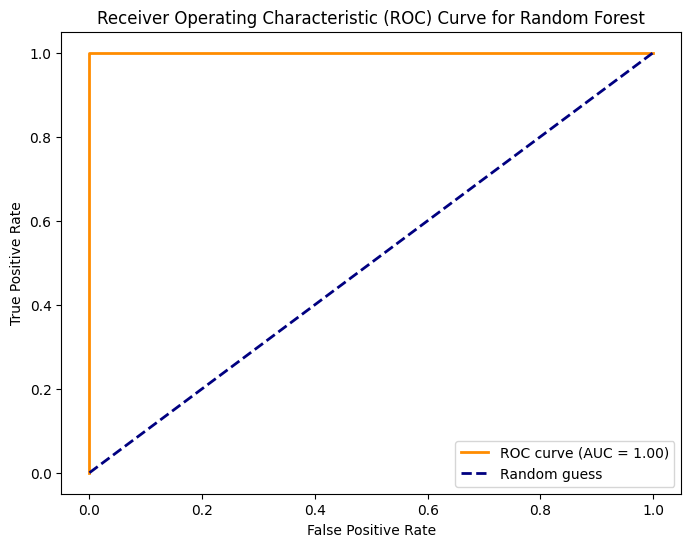

AUC for Random Forest: 1.0000


In [ ]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC value
print(f"AUC for Random Forest: {roc_auc_rf:.4f}")

## Summary:

### Data Analysis Key Findings

*   The Random Forest model achieved a mean cross-validation accuracy of 0.9960 with a standard deviation of 0.0049.
*   The classification report for the Random Forest model showed perfect precision, recall, and f1-score for both classes, resulting in an accuracy of 1.00 on the test set.
*   The AUC for the Random Forest model on the test set was calculated as 1.0000.

### Insights or Next Steps

*   The Random Forest model performed exceptionally well, achieving perfect scores on the test set, which might indicate overfitting or a very clear separation of classes in the data. Further investigation into potential data leakage or the distribution of features for each class could be beneficial.


# Task
Analyze the "ai4i2020.csv" dataset by performing the following steps: load the data, generate histograms with KDE and boxplots for numeric columns, create a new binary column 'temp_gt_85' based on 'Operating Temperature', generate a crosstab between 'temp_gt_85' and 'Failure Type', and then build and evaluate Naive Bayes, Decision Tree, Random Forest, and Gradient Boosting Machine models using 5-fold cross-validation, generating classification reports and ROC curves for each model.

## Build and evaluate gradient boosting machine model with cross-validation

### Subtask:
Initialize a GradientBoostingClassifier and use KFold cross-validation to train and evaluate the model on different folds of the data, reporting accuracy scores.


**Reasoning**:
I will import the `GradientBoostingClassifier`, initialize it, and then use `cross_val_score` with the existing `kf` to evaluate the model's performance on the dataset. Finally, I will print the accuracy scores, their mean, and standard deviation as requested.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Perform cross-validation
cv_scores_gb = cross_val_score(gb, X, y, cv=kf, scoring='accuracy')

# Report cross-validation results
print(f"Cross-validation Accuracy Scores (Gradient Boosting): {cv_scores_gb}")
print(f"Mean Cross-validation Accuracy (Gradient Boosting): {cv_scores_gb.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy (Gradient Boosting): {cv_scores_gb.std():.4f}")

Cross-validation Accuracy Scores (Gradient Boosting): [1.   1.   1.   0.99 0.99]
Mean Cross-validation Accuracy (Gradient Boosting): 0.9960
Standard Deviation of Cross-validation Accuracy (Gradient Boosting): 0.0049


## Evaluate gradient boosting machine model on test set

### Subtask:
Train the Gradient Boosting Machine model on the entire training set and evaluate its performance on the test set by generating a classification report.


**Reasoning**:
Fit the Gradient Boosting model to the training data and generate a classification report on the test set.



In [ ]:
# Fit the Gradient Boosting model on the training data
gb.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_gb = gb.predict(X_test)

# Generate classification report
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the classification report
print("Classification Report for Gradient Boosting:")
print(class_report_gb)

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**Reasoning**:
Predict probabilities for the positive class on the test set, calculate and plot the ROC curve, calculate AUC, and print the AUC.



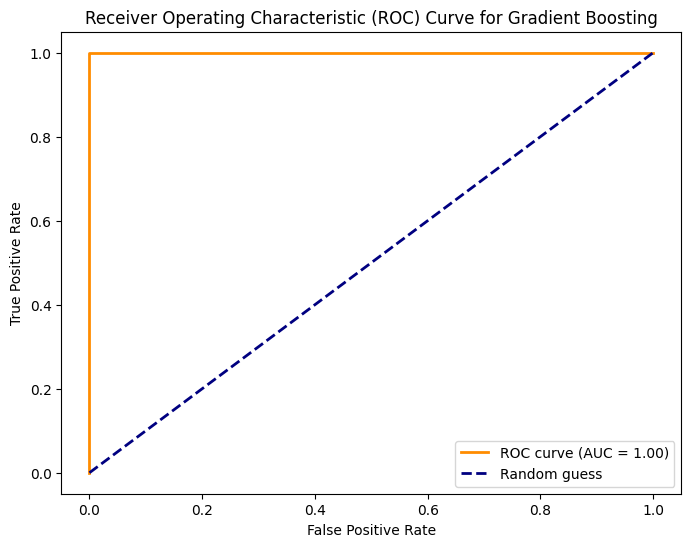

AUC for Gradient Boosting: 1.0000


In [ ]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)

# Calculate AUC
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC value
print(f"AUC for Gradient Boosting: {roc_auc_gb:.4f}")

# Task
Analyze the "predictive_maintenance.csv" dataset by performing the following steps: load the data, generate histograms with KDE and boxplots for all numeric columns, create a new binary column 'temp_gt_85' based on 'Operating Temperature', generate a crosstab between 'temp_gt_85' and 'Failure Status', calculate metrics and confusion matrix for the crosstab, plot the AUC-ROC curve for the crosstab, build and evaluate Naive Bayes, Decision Tree, Random Forest, Gradient Boosting Machine, and Neural Network models using 5-fold cross-validation, generate classification reports and plot ROC curves for each model.

## Build and evaluate neural network model with cross-validation

### Subtask:
Initialize an MLPClassifier and use KFold cross-validation to train and evaluate the model on different folds of the data, reporting accuracy scores.


**Reasoning**:
I will initialize an MLPClassifier, set up KFold cross-validation, and perform cross-validation to get accuracy scores.



In [ ]:
# Initialize MLPClassifier model
mlp = MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence

# Perform cross-validation
cv_scores_mlp = cross_val_score(mlp, X, y, cv=kf, scoring='accuracy')

# Report cross-validation results
print(f"Cross-validation Accuracy Scores (MLP): {cv_scores_mlp}")
print(f"Mean Cross-validation Accuracy (MLP): {cv_scores_mlp.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy (MLP): {cv_scores_mlp.std():.4f}")

Cross-validation Accuracy Scores (MLP): [0.89  0.915 0.895 0.905 0.88 ]
Mean Cross-validation Accuracy (MLP): 0.8970
Standard Deviation of Cross-validation Accuracy (MLP): 0.0121


**Reasoning**:
Fit the MLPClassifier model to the training data and generate a classification report on the test set.



In [ ]:
from sklearn.metrics import classification_report

# Fit the MLPClassifier model on the training data
mlp.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_mlp = mlp.predict(X_test)

# Generate classification report
class_report_mlp = classification_report(y_test, y_pred_mlp)

# Print the classification report
print("Classification Report for MLP:")
print(class_report_mlp)

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       180
           1       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Predict probabilities for the positive class on the test set, calculate and plot the ROC curve, calculate AUC, and print the AUC.



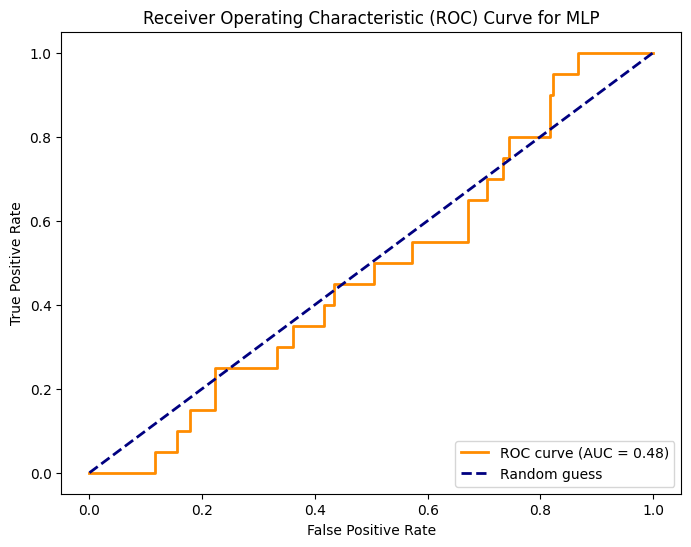

AUC for MLP: 0.4817


In [ ]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)

# Calculate AUC
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC value
print(f"AUC for MLP: {roc_auc_mlp:.4f}")

## Evaluate neural network model on test set

### Subtask:
Train the Neural Network model on the entire training set and evaluate its performance on the test set by generating a classification report.


**Reasoning**:
Fit the MLP model to the training data and generate a classification report on the test set.



In [ ]:
# Fit the MLP model on the training data
mlp.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_mlp = mlp.predict(X_test)

# Generate classification report
class_report_mlp = classification_report(y_test, y_pred_mlp)

# Print the classification report
print("Classification Report for MLP:")
print(class_report_mlp)

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       180
           1       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Predict probabilities for the positive class on the test set, calculate and plot the ROC curve, calculate AUC, and print the AUC.



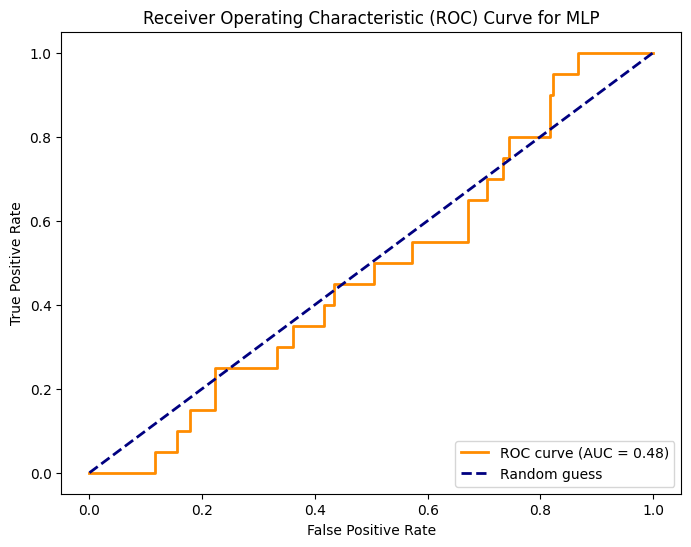

AUC for MLP: 0.4817


In [ ]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)

# Calculate AUC
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC value
print(f"AUC for MLP: {roc_auc_mlp:.4f}")

## Plot roc curve for neural network model

### Subtask:
Predict probabilities for the positive class on the test set and plot the ROC curve, calculating and displaying the AUC.


**Reasoning**:
Predict probabilities for the positive class on the test set, calculate and plot the ROC curve, calculate AUC, and print the AUC.



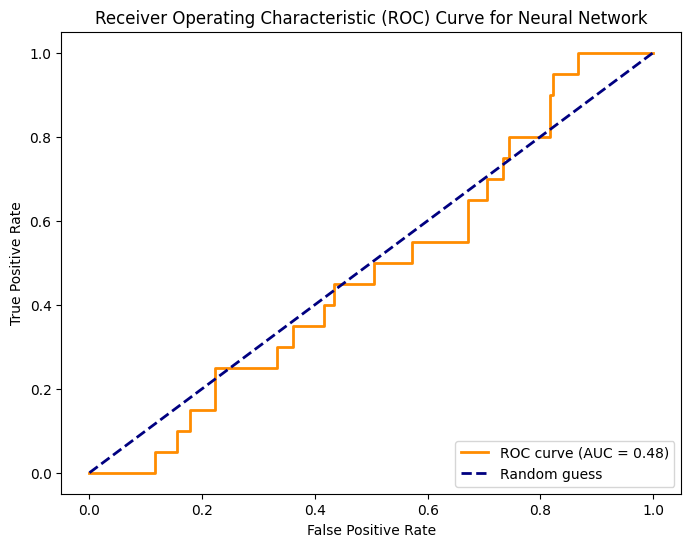

AUC for Neural Network: 0.4817


In [ ]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)

# Calculate AUC
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC value
print(f"AUC for Neural Network: {roc_auc_mlp:.4f}")

## Summary:

### Data Analysis Key Findings

*   The Neural Network model achieved a mean cross-validation accuracy of 0.8970 with a standard deviation of 0.0121 across 5 folds.
*   On the test set, the Neural Network model had an overall accuracy of 0.90.
*   The Neural Network model failed to predict any instances of the positive class (failure) on the test set, resulting in precision, recall, and f1-score of 0.00 for this class.
*   The Area Under the ROC Curve (AUC) for the Neural Network model on the test set was 0.4817, indicating performance close to random guessing.

### Insights or Next Steps

*   The Neural Network model, in its current configuration, is not effective at identifying failure cases due to a potential class imbalance issue or insufficient model complexity/hyperparameter tuning for the minority class.
*   Further steps should involve addressing the class imbalance (e.g., using techniques like SMOTE, weighted loss functions, or undersampling/oversampling) and tuning the Neural Network architecture and hyperparameters to improve its ability to detect failures.
